In [2]:
# imports
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
from torch.nn import Linear, Conv2d, BatchNorm2d, MaxPool2d, Dropout
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax
from sklearn.metrics import accuracy_score
import torch.optim as optim
import glob
from torch.utils.data import Dataset, DataLoader
import math
import pandas as pd
import os
from os import listdir
from os.path import join, isfile
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from datetime import date, datetime
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy import signal

### Standardizer 
### Final loop for all files 

In [ ]:
labels = pd.read_csv('data/bagData/Labels_all.csv')

for idx in range(len(labels)):
    filename = labels.iloc[idx]['filenames']
    data = np.load('data/bagData/'+filename).astype(np.float64)

    acc_data = data[:,:,[0,1,2,6,7,8]];
    gyr_data = data[:,:,[3,4,5,9,10,11]];
    mu_acc = np.mean(acc_data);
    sd_acc = np.std(acc_data);
    mu_gyr = np.mean(gyr_data);
    sd_gyr = np.std(gyr_data);

    data[:, :, [0,1,2,6,7,8]] = (acc_data - mu_acc)/sd_acc;
    data[:, :, [3,4,5,9,10,11]] = (gyr_data - mu_gyr) / sd_gyr;

    #np.save('data/stdnorm/'+filename, data)


### Visualizations 

In [6]:
# taking one example to illustrate the idea:
r = '/Users/jiayihan/OneDrive - Danmarks Tekniske Universitet/Thesis/Thesis_OnlineData/data/bagData/'
f = '/Users/jiayihan/OneDrive - Danmarks Tekniske Universitet/Thesis/Thesis_OnlineData/data/stdnorm/'
labels = pd.read_csv('/Users/jiayihan/OneDrive - Danmarks Tekniske Universitet/Thesis/Thesis_OnlineData/data/bagData/Labels_all.csv')
idx = 1
filename = labels.iloc[idx]['filenames']
dataR = np.load(r+filename).astype(np.float64)
dataF = np.load(f+filename).astype(np.float64)

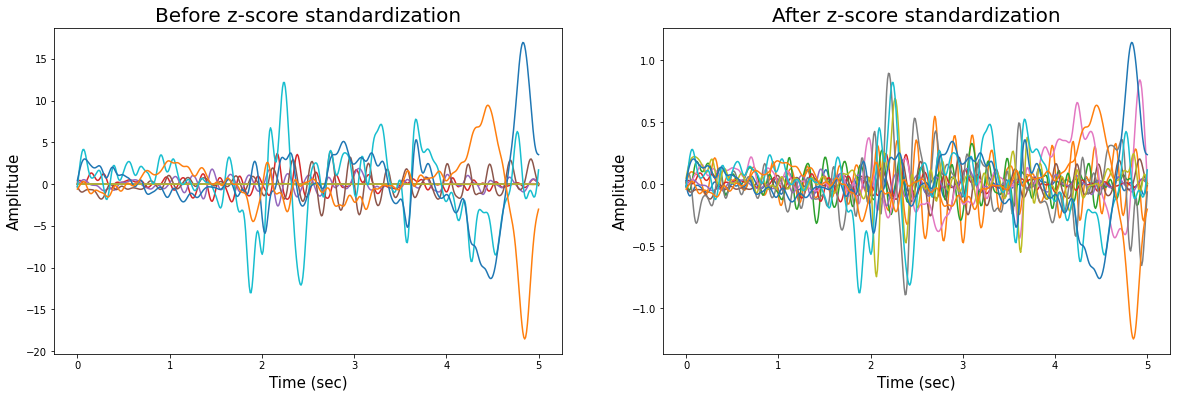

In [11]:
fig = plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
time = np.linspace(0, 5, 500, endpoint=True)

plt.plot(time,dataR[0,:,0])
plt.plot(time,dataR[0,:,1])
plt.plot(time,dataR[0,:,2])
plt.plot(time,dataR[0,:,3])
plt.plot(time,dataR[0,:,4])
plt.plot(time,dataR[0,:,5])
plt.plot(time,dataR[0,:,6])
plt.plot(time,dataR[0,:,7])
plt.plot(time,dataR[0,:,8])
plt.plot(time,dataR[0,:,9])
plt.plot(time,dataR[0,:,10])
plt.plot(time,dataR[0,:,11])
plt.ylabel('Amplitude',fontsize = 15)
plt.xlabel('Time (sec)',fontsize = 15)
plt.title('Before z-score standardization',fontsize = 20)


plt.subplot(1,2,2)

plt.plot(time,dataF[0,:,0])
plt.plot(time,dataF[0,:,1])
plt.plot(time,dataF[0,:,2])
plt.plot(time,dataF[0,:,3])
plt.plot(time,dataF[0,:,4])
plt.plot(time,dataF[0,:,5])
plt.plot(time,dataF[0,:,6])
plt.plot(time,dataF[0,:,7])
plt.plot(time,dataF[0,:,8])
plt.plot(time,dataF[0,:,9])
plt.plot(time,dataF[0,:,10])
plt.plot(time,dataF[0,:,11])

plt.xlabel('Time (sec)',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.title('After z-score standardization',fontsize = 20)
fig.savefig('/Users/jiayihan/OneDrive - Danmarks Tekniske Universitet/Thesis/Thesis_figures/beforeafter.png')